In [9]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

In [14]:
!ls -lsat

total 357012
     4 drwxr-xr-x 1 root root      4096 Apr 22 18:18 .
 78400 -rw-r--r-- 1 root root  80275460 Apr 22 18:14 iowa_liquor_sales.zip
     4 drwxr-xr-x 2 root root      4096 Apr 22 18:11 .ipynb_checkpoints
     4 drwxr-xr-x 1 root root      4096 Apr 22 17:54 ..
278592 -rw-r--r-- 1 root root 285275332 Apr 22 11:52 iowa_liquor_sales.csv
     4 drwxr-xr-x 1 root root      4096 Apr 19 13:37 sample_data
     4 drwxr-xr-x 4 root root      4096 Apr 19 13:36 .config


In [12]:
#!unzip iowa_liquor_sales.zip

Archive:  iowa_liquor_sales.zip
  inflating: iowa_liquor_sales.csv   


In [16]:
df = pd.read_csv('iowa_liquor_sales.zip')
df.head()

Unnamed: 0 Invoice/Item Number        Date  Store Number  \
0           0        S29198800001  11/20/2015          2191   
1           1        S29195400002  11/21/2015          2205   
2           2        S29050300001  11/16/2015          3549   
3           3        S28867700001  11/04/2015          2513   
4           4        S29050800001  11/17/2015          3942   

                         Store Name              Address          City  \
0                    Keokuk Spirits            1013 MAIN        KEOKUK   
1            Ding's Honk And Holler     900 E WASHINGTON      CLARINDA   
2              Quicker Liquor Store         1414 48TH ST  FORT MADISON   
3  Hy-Vee Food Store #2 / Iowa City       812  S 1ST AVE     IOWA CITY   
4                  Twin Town Liquor  104 HIGHWAY 30 WEST        TOLEDO   

  Zip Code                                     Store Location  County Number  \
0    52632    1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)           56.0   
1    51632  900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...           73.0   
2    52627  1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...           56.0   
3    52240                   812 S 1ST AVE\nIOWA CITY 52240\n           52.0   
4    52342  104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...           86.0   

   ... Item Number                               Item Description Pack  \
0  ...         297                          Templeton Rye w/Flask    6   
1  ...         297                          Templeton Rye w/Flask    6   
2  ...         249  Disaronno Amaretto Cavalli Mignon 3-50ml Pack   20   
3  ...         237                 Knob Creek w/ Crystal Decanter    3   
4  ...         249  Disaronno Amaretto Cavalli Mignon 3-50ml Pack   20   

   Bottle Volume (ml) State Bottle Cost  State Bottle Retail Bottles Sold  \
0                 750            $18.09               $27.14            6   
1                 750            $18.09               $27.14           12   
2                 150             $6.40                $9.60            2   
3                1750            $35.55               $53.34            3   
4                 150             $6.40                $9.60            2   

   Sale (Dollars)  Volume Sold (Liters) Volume Sold (Gallons)  
0         $162.84                  4.50                  1.19  
1         $325.68                  9.00                  2.38  
2          $19.20                  0.30                  0.08  
3         $160.02                  5.25                  1.39  
4          $19.20                  0.30                  0.08  

[5 rows x 25 columns]

In [19]:
col_name = ['City', 'Item Description']
quantity_col_name = 'Bottle Volume (ml)'

In [22]:
tot = df.groupby(col_name)[quantity_col_name].sum()
tot.head()

City    Item Description            
ACKLEY  Absolut Swedish Vodka 80 Prf    2250
        Admiral Nelson Spiced Rum       8250
        Ancient Age Bourbon              750
        Bacardi Gold Rum                 750
        Bacardi Limon                    750
Name: Bottle Volume (ml), dtype: int64

In [23]:
tot.describe()

count    1.148990e+05
mean     8.129368e+03
std      2.913323e+04
min      0.000000e+00
25%      7.500000e+02
50%      2.000000e+03
75%      5.500000e+03
max      2.087675e+06
Name: Bottle Volume (ml), dtype: float64

In [24]:
tot.sort_values(ascending=False)

City          Item Description                        
DES MOINES    Hawkeye Vodka                               2087675
              Black Velvet                                1687400
CEDAR RAPIDS  Hawkeye Vodka                               1645175
DES MOINES    Fireball Cinnamon Whiskey Mini Dispenser    1590000
CEDAR RAPIDS  Black Velvet                                1290100
                                                           ...   
SIOUX CITY    99 Blackberries Mini                             50
DUBUQUE       Maker's Mark Mini                                50
DAVENPORT     Dr. McGillicuddy Root Beer Mini                  50
DES MOINES    Grappa Moscato 50ml                              50
DAVENPORT     Burnett's Pink Lemonade Vodka Mini                0
Name: Bottle Volume (ml), Length: 114899, dtype: int64

# Creación de histograma con los bines logarítmicos

<Axes: ylabel='Frequency'>

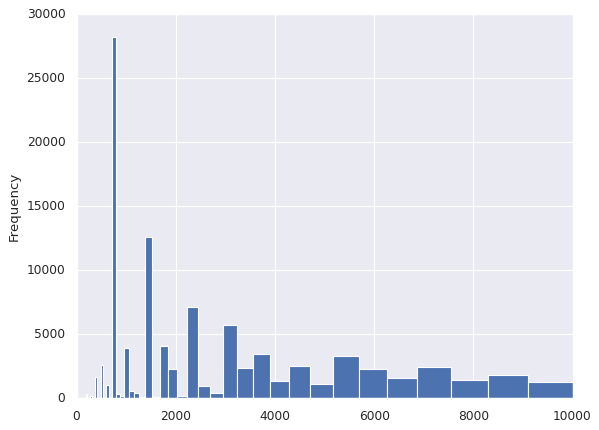

In [37]:
tot.plot.hist(bins=np.logspace(np.log10(100),np.log10(10_000), 50))

In [38]:
# Para saber el tipo de bebida
tot.index.get_level_values(-1).unique()

Index(['Absolut Swedish Vodka 80 Prf', 'Admiral Nelson Spiced Rum',
       'Ancient Age Bourbon', 'Bacardi Gold Rum', 'Bacardi Limon',
       'Bacardi Superior Rum', 'Bacardi Superior Rum Mini',
       'Bailey's Original Irish Cream', 'Barton Vodka',
       'Beam's 8 Star Bl Whiskey',
       ...
       'Margaritaville Island Lime Tequila', 'Square One Basil Vodka',
       'Talisker Distillers Edition HA', 'Thatchers Elderflower',
       'Three Olives Root Beer', 'Wiser's Legacy', 'Nuvo Liqueur',
       'Forty Creek Confederation Oak HA', 'Karimba Coffee Liqueur',
       'Oronoco Platinum Reserve Rum'],
      dtype='object', name='Item Description', length=3301)

In [39]:
# Para saber las ciudades
tot.index.get_level_values(0).unique()

Index(['ACKLEY', 'ADAIR', 'ADEL', 'AFTON', 'AKRON', 'ALBIA', 'ALDEN', 'ALGONA',
       'ALLISON', 'ALTA',
       ...
       'WHITTEMORE', 'WILLIAMSBURG', 'WILTON', 'WINDSOR HEIGHTS', 'WINTERSET',
       'WINTHROP', 'WOODBINE', 'WOODWARD', 'Windsor Heights', 'ZWINGLE'],
      dtype='object', name='City', length=394)

# Pregunta

Basado en la estrategia empleada en los gráficos de distribución revisados en clase y mostrado a continuación:

Obtener la distribución del volumen "Bottle Volume (ml)" para 4 tipos diferentes de licores que son: Whiskey, Rum, Vodka y Beer para las 4 Ciudades más consumidoras de licor. La distribuciones deben ser histogramas de los volumes  según el tipo de bebida según sean las cuidades que más venden.



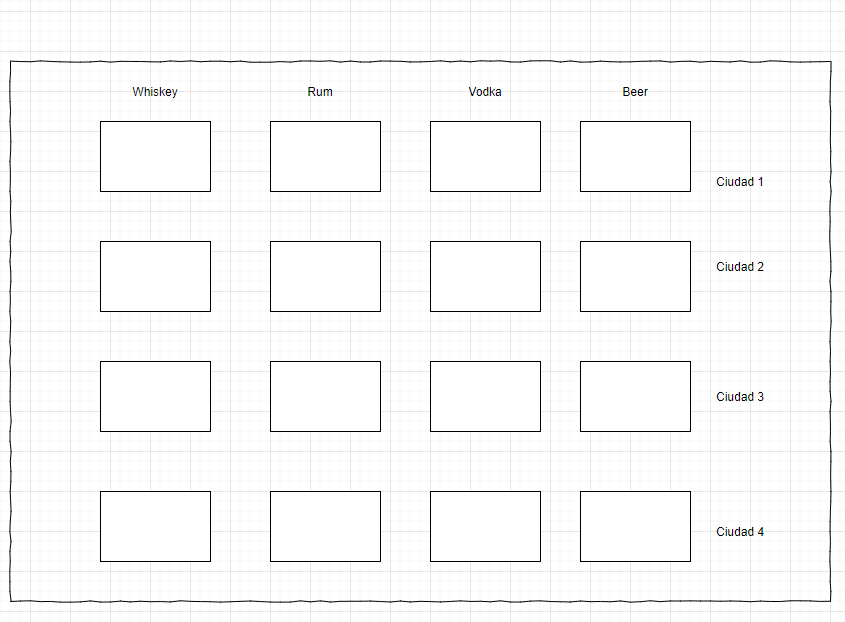

In [40]:
# quiero ver como estan los datos
tot.head()

City    Item Description            
ACKLEY  Absolut Swedish Vodka 80 Prf    2250
        Admiral Nelson Spiced Rum       8250
        Ancient Age Bourbon              750
        Bacardi Gold Rum                 750
        Bacardi Limon                    750
Name: Bottle Volume (ml), dtype: int64

In [41]:
# convertir los niveles del indice como columna
df = tot.reset_index()

In [42]:
df.head()

City              Item Description  Bottle Volume (ml)
0  ACKLEY  Absolut Swedish Vodka 80 Prf                2250
1  ACKLEY     Admiral Nelson Spiced Rum                8250
2  ACKLEY           Ancient Age Bourbon                 750
3  ACKLEY              Bacardi Gold Rum                 750
4  ACKLEY                 Bacardi Limon                 750

In [43]:
df.shape

(114899, 3)

In [45]:
df_city_desc = df[['City', 'Item Description', 'Bottle Volume (ml)']]

# filtrado para solo tener los tados de los bebidas seleccionadas
df_city_desc = df_city_desc[
             df_city_desc['Item Description'].str.contains('Vodka') |
             df_city_desc['Item Description'].str.contains('Rum') |
             df_city_desc['Item Description'].str.contains('Whiskey') |
             df_city_desc['Item Description'].str.contains('Beer')]

In [46]:
df_city_desc.shape

(28614, 3)

In [47]:
df_city_desc['Item Description'].nunique()

614

In [49]:
df_city_desc.groupby('City')['Bottle Volume (ml)'].sum().head()

City
ACKLEY    142500
ADAIR      75275
ADEL      462900
AFTON      51950
AKRON      93550
Name: Bottle Volume (ml), dtype: int64

In [55]:
# el analisis de las cuidades que mas venden licor
# nos permite ver el flujo de las transformaciones
cities = (
    df_city_desc.groupby('City')
    .sum()
    .sort_values(by='Bottle Volume (ml)', ascending=False)
    .head(4)
    .index
    .values)
cities

<ipython-input-55-7e576dbd48e7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city_desc.groupby('City')


array(['DES MOINES', 'CEDAR RAPIDS', 'DAVENPORT', 'IOWA CITY'],
      dtype=object)

In [56]:
# solo usando las 4 ciudades mas consumidoras de licor
df_city_desc = df_city_desc[df_city_desc['City'].isin(cities)]

In [57]:
df_city_desc.shape

(1449, 3)

In [58]:
df_city_desc['Item Description']

17608                               10 Cane Rum
17623                360 Double Chocolate Vodka
17624                   360 Georgia Peach Vodka
17626                     360 Huckleberry Vodka
17627              360 Madagascar Vanilla Vodka
                          ...                  
55523                                  Uv Vodka
55524    Van Gogh Peanut Butter and Jelly Vodka
55527                           Voli Lyte Vodka
55531        Whitetail Caramel Flavored Whiskey
55541                      Windmill Rye Whiskey
Name: Item Description, Length: 1449, dtype: object

In [59]:
df_city_desc['Tipo'] = ["Vodka" if "Vodka" in s else
                        "Rum" if "Rum" in s else
                        "Whiskey" if "Whiskey" in s else
                        "Beer" if "Beer" in s else
                        " " for s in df_city_desc['Item Description']]

In [60]:
df_city_desc.head()

City              Item Description  Bottle Volume (ml)   Tipo
17608  CEDAR RAPIDS                   10 Cane Rum                6750    Rum
17623  CEDAR RAPIDS    360 Double Chocolate Vodka               15000  Vodka
17624  CEDAR RAPIDS       360 Georgia Peach Vodka                4500  Vodka
17626  CEDAR RAPIDS         360 Huckleberry Vodka                1500  Vodka
17627  CEDAR RAPIDS  360 Madagascar Vanilla Vodka                 750  Vodka

In [61]:
grp_alc_beberages = df_city_desc.groupby(['City','Tipo','Item Description']).sum()
grp_alc_beberages.head()

Bottle Volume (ml)
City         Tipo Item Description                                         
CEDAR RAPIDS Beer Dekuyper Ragin' Root Beer Schnapps                  15000
                  Dr. McGillicuddy's Root Beer Mini                    3000
                  Dr. Mcgillicuddy's Root Beer Schnapps                9750
                  Phillips Root Beer Schnapps                         70000
                  Smirnoff Root Beer Float                             9000

In [62]:
split_index = grp_alc_beberages.reset_index()
split_index.head()

City  Tipo                       Item Description  \
0  CEDAR RAPIDS  Beer     Dekuyper Ragin' Root Beer Schnapps   
1  CEDAR RAPIDS  Beer      Dr. McGillicuddy's Root Beer Mini   
2  CEDAR RAPIDS  Beer  Dr. Mcgillicuddy's Root Beer Schnapps   
3  CEDAR RAPIDS  Beer            Phillips Root Beer Schnapps   
4  CEDAR RAPIDS  Beer               Smirnoff Root Beer Float   

   Bottle Volume (ml)  
0               15000  
1                3000  
2                9750  
3               70000  
4                9000

In [63]:
# escalado a los datos. hacia escala logaritmica
split_index['Bottle Volume_decadas (ml)'] = np.log10(split_index['Bottle Volume (ml)'])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [64]:
split_index.head()

City  Tipo                       Item Description  \
0  CEDAR RAPIDS  Beer     Dekuyper Ragin' Root Beer Schnapps   
1  CEDAR RAPIDS  Beer      Dr. McGillicuddy's Root Beer Mini   
2  CEDAR RAPIDS  Beer  Dr. Mcgillicuddy's Root Beer Schnapps   
3  CEDAR RAPIDS  Beer            Phillips Root Beer Schnapps   
4  CEDAR RAPIDS  Beer               Smirnoff Root Beer Float   

   Bottle Volume (ml)  Bottle Volume_decadas (ml)  
0               15000                    4.176091  
1                3000                    3.477121  
2                9750                    3.989005  
3               70000                    4.845098  
4                9000                    3.954243

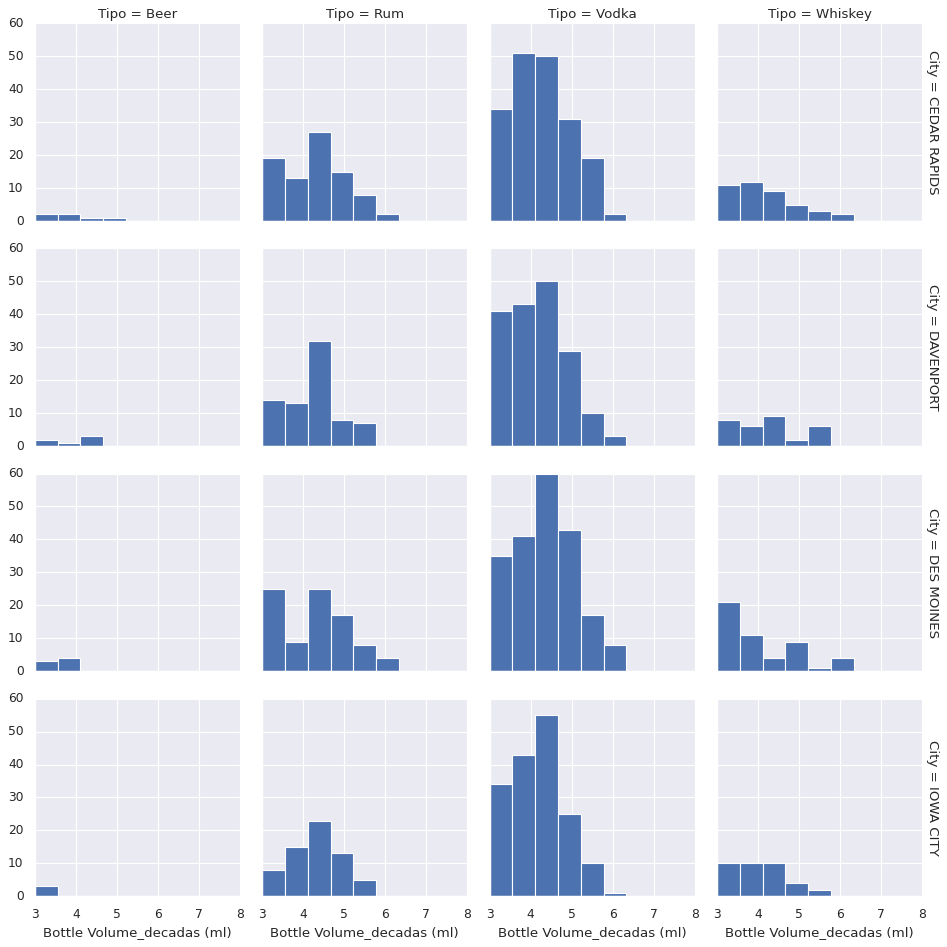

In [65]:
grid = sns.FacetGrid(split_index, row='City', col='Tipo', margin_titles=True)
grid.map(plt.hist, 'Bottle Volume_decadas (ml)', bins=np.linspace(3, 8, 10));

In [ ]:
split_index.head()

City  Tipo                       Item Description  \
0  CEDAR RAPIDS  Beer     Dekuyper Ragin' Root Beer Schnapps   
1  CEDAR RAPIDS  Beer      Dr. McGillicuddy's Root Beer Mini   
2  CEDAR RAPIDS  Beer  Dr. Mcgillicuddy's Root Beer Schnapps   
3  CEDAR RAPIDS  Beer            Phillips Root Beer Schnapps   
4  CEDAR RAPIDS  Beer               Smirnoff Root Beer Float   

   Bottle Volume (ml)  Bottle Volume_decadas (ml)  
0               15000                    9.615805  
1                3000                    8.006368  
2                9750                    9.185023  
3               70000                   11.156251  
4                9000                    9.104980

In [66]:
split_index[split_index['Tipo'] == 'Beer']['Item Description'].nunique()

9

In [67]:
split_index[split_index['Tipo'] == 'Vodka']['Item Description'].nunique()

289